## Loading Data and Inspection

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Housing.csv')

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.shape

(545, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data Cleaning

In [8]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

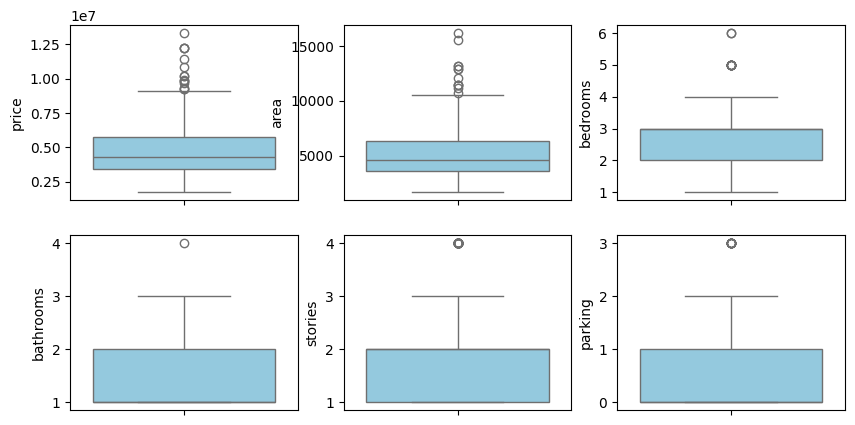

In [9]:
#Outlier Analysis
fig, axs=plt.subplots(2,3,figsize=(10,5))
plt_1=sns.boxplot(data['price'],ax=axs[0,0],color='skyblue')
plt_2=sns.boxplot(data['area'],ax=axs[0,1],color='skyblue')
plt_3=sns.boxplot(data['bedrooms'],ax=axs[0,2],color='skyblue')
plt_4=sns.boxplot(data['bathrooms'],ax=axs[1,0],color='skyblue')
plt_5=sns.boxplot(data['stories'],ax=axs[1,1],color='skyblue')
plt_6=sns.boxplot(data['parking'],ax=axs[1,2],color='skyblue')

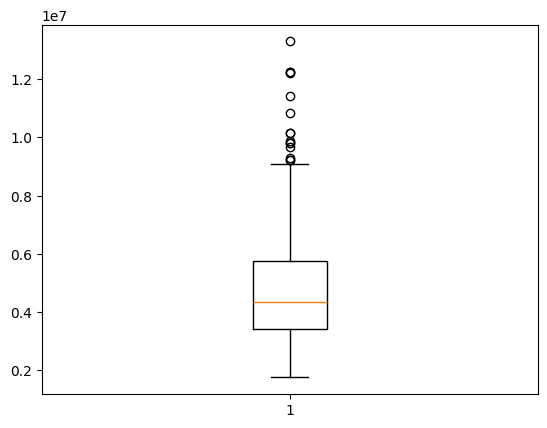

In [10]:
#outlier treatement for price
plt.boxplot(data.price)
q1=data.price.quantile(0.25)
q3=data.price.quantile(0.75)
iqr=q3-q1
data=data[(data.price>=q1 - 1.5*iqr)&(data.price <=q3+1.5*iqr)]

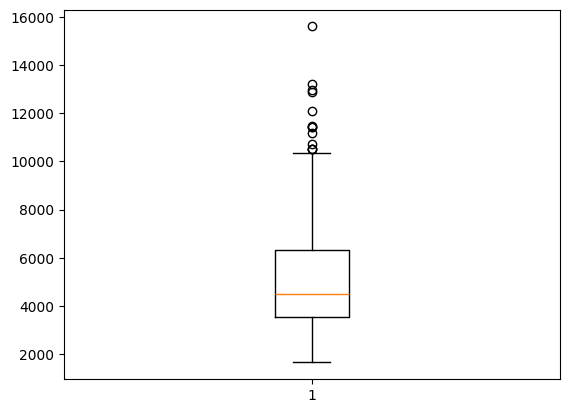

In [11]:
#outlier treatment for area
plt.boxplot(data.area)
q1=data.area.quantile(0.25)
q3=data.area.quantile(0.75)
iqr=q3-q1
data=data[(data.area>=q1-1.5*iqr)&(data.area<=q3+1.5*iqr)]

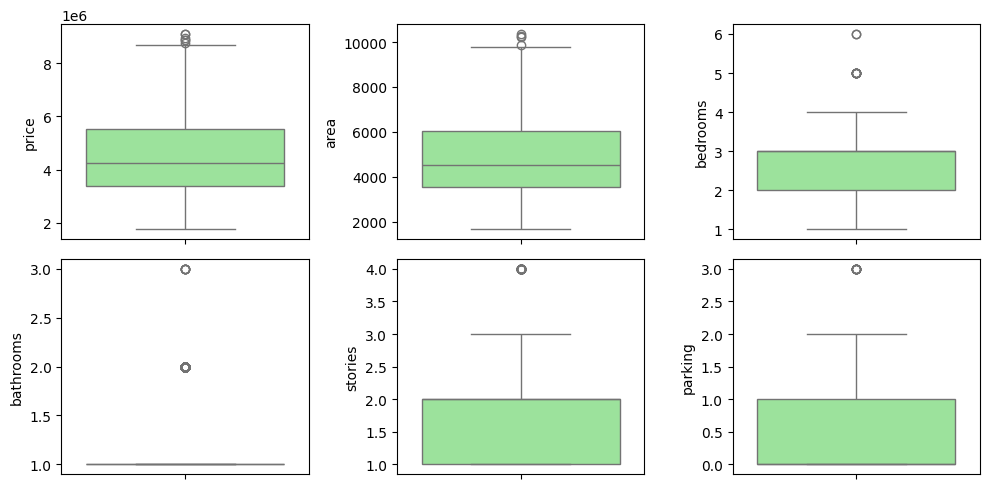

In [12]:
#outlier analysis
fig, axs=plt.subplots(2,3,figsize=(10,5))
plt_1=sns.boxplot(data['price'],ax=axs[0,0],color='lightgreen')
plt_2=sns.boxplot(data['area'],ax=axs[0,1],color='lightgreen')
plt_3=sns.boxplot(data['bedrooms'],ax=axs[0,2],color='lightgreen')
plt_4=sns.boxplot(data['bathrooms'],ax=axs[1,0],color='lightgreen')
plt_5=sns.boxplot(data['stories'],ax=axs[1,1],color='lightgreen')
plt_6=sns.boxplot(data['parking'],ax=axs[1,2],color='lightgreen')

plt.tight_layout()

## Exploratory Data Analysis

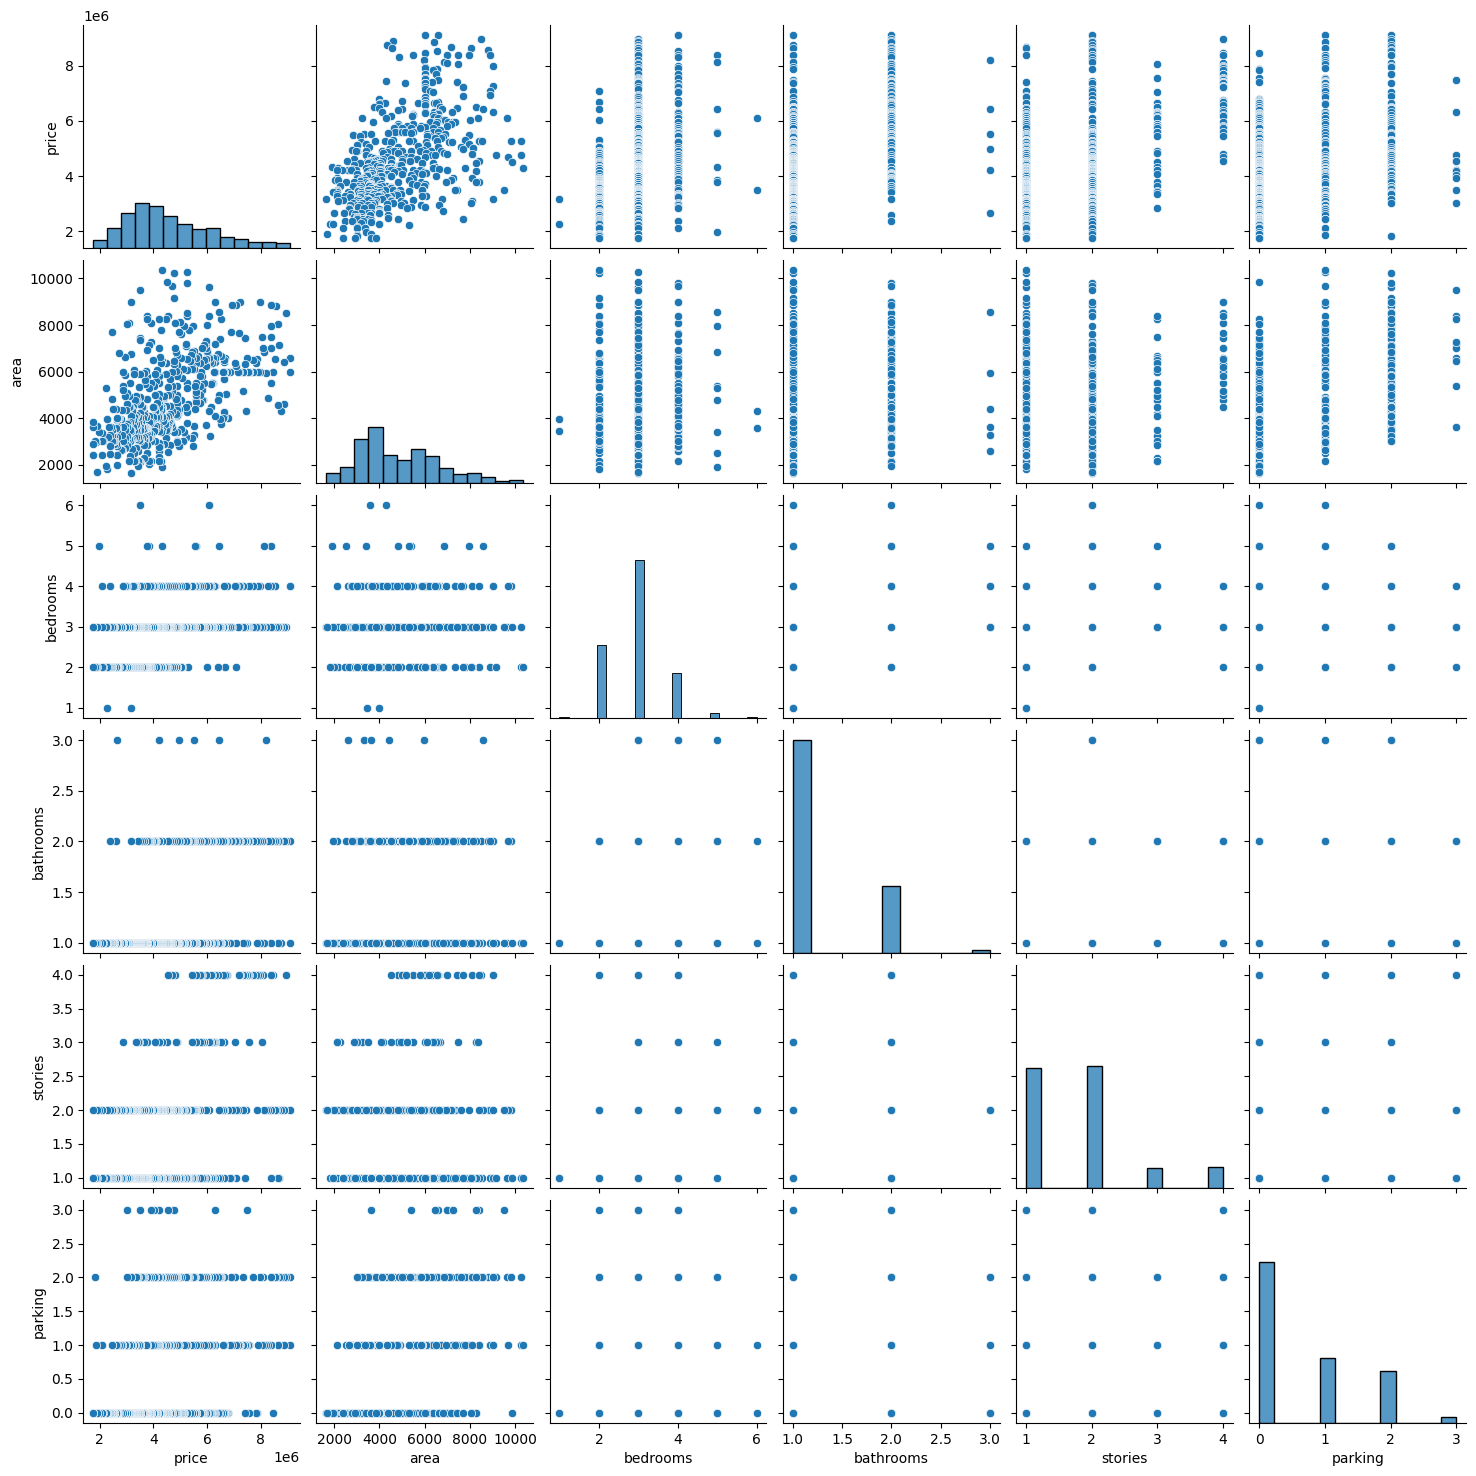

In [13]:
sns.pairplot(data)
plt.show()

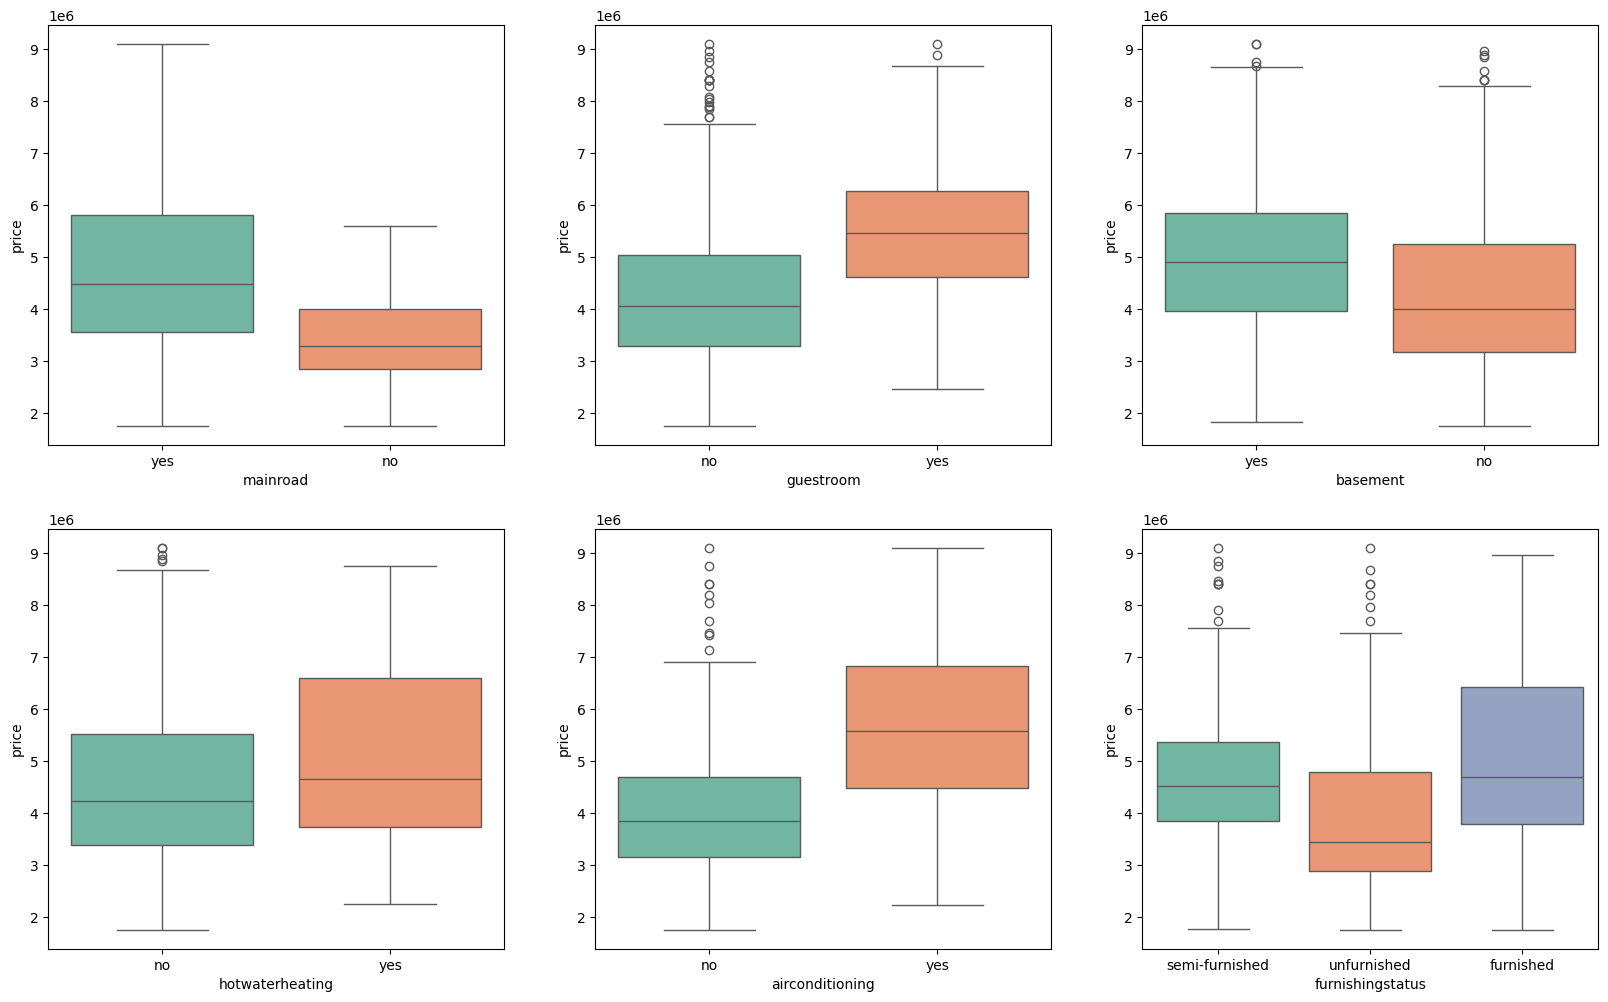

In [14]:
#Categorical variable visulaization

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=data,palette='Set2')
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=data,palette='Set2')
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=data,palette='Set2')
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data,palette='Set2')
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data,palette='Set2')
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data,palette='Set2')
plt.show()

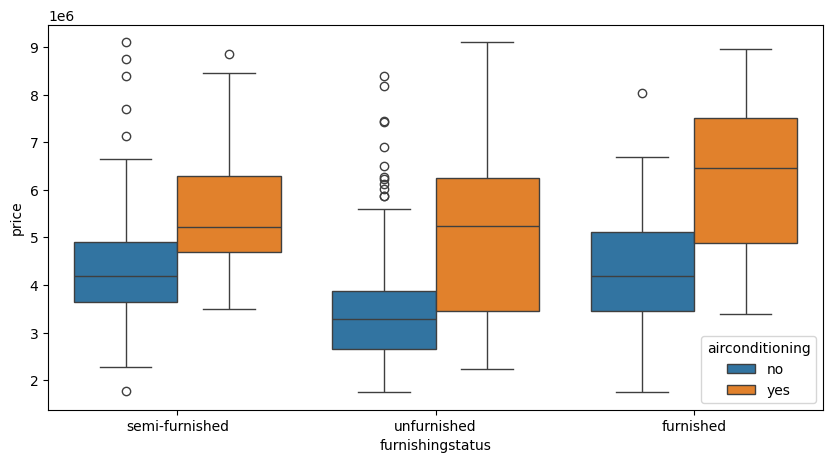

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='furnishingstatus',y='price',hue='airconditioning',data=data)
plt.show()

## Data Preparation

In [16]:
varlis=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def bin_map(x):
    return x.map({'yes':1, 'no':0})

data[varlis]=data[varlis].apply(bin_map)
    

In [17]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


## Data Variables

In [18]:
status=pd.get_dummies(data['furnishingstatus'])

In [19]:
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [20]:
status=pd.get_dummies(data['furnishingstatus'],drop_first=True)

In [21]:
data=pd.concat([data,status],axis=1)

In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


## Spilitting the Data into Training and Testing Sets

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()

In [26]:
num_var=['area','bedrooms','bathrooms','stories','parking','price']
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [27]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,semi-furnished,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,furnished,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,furnished,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,unfurnished,False,True


In [28]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


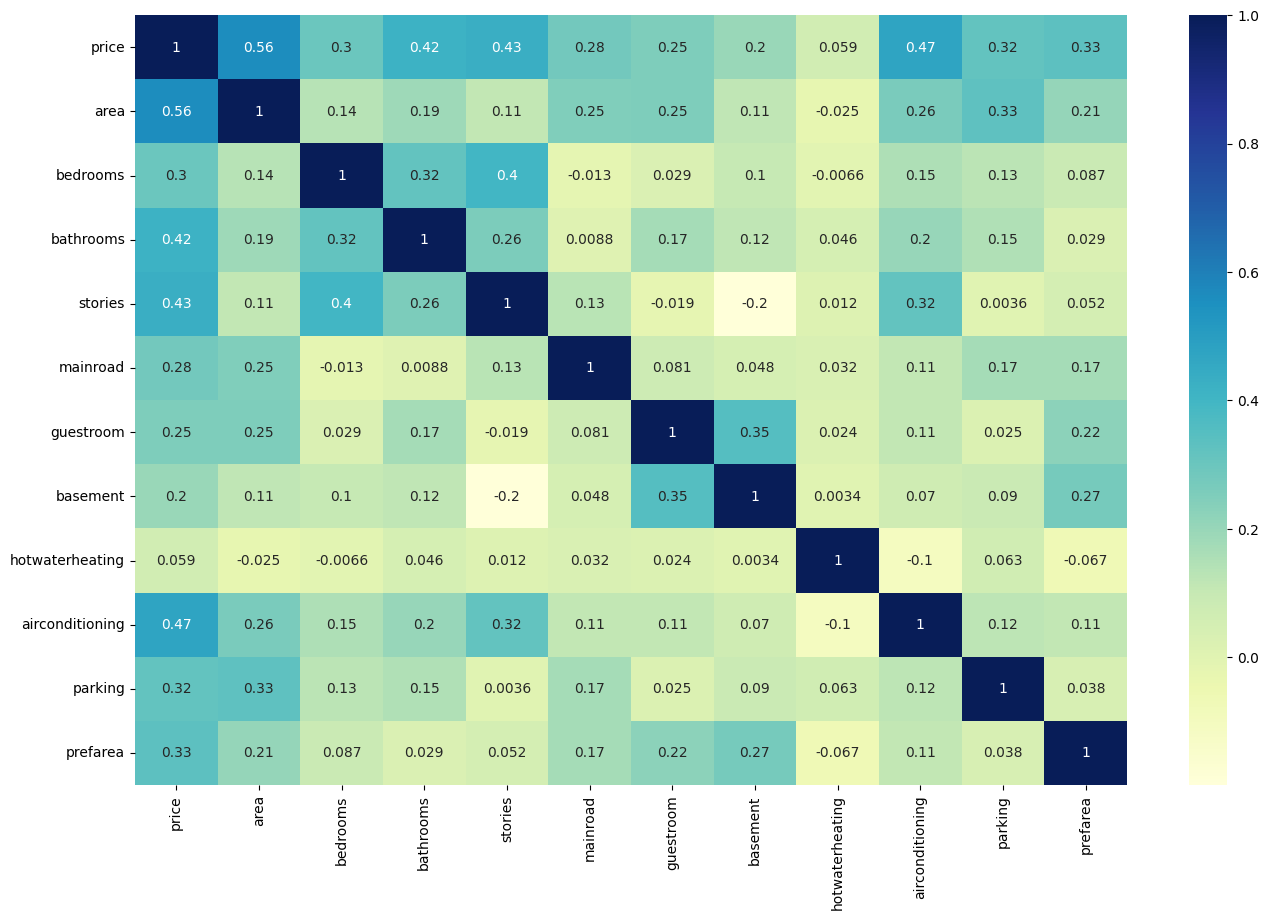

In [29]:
numeric_df=df_train.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Dividing into X and Y sets for the model building

In [30]:
y_tain=df_train.pop('price')
X_train=df_train

## Model Building

### RFE

In [31]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [32]:
for col in X_train.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    X_train[col]=le.fit_transform(X_train[col])

lm=LinearRegression()
lm.fit(X_train,y_tain)

LinearRegression()

In [33]:
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe=rfe.fit(X_train,y_tain)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 9),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 8),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('furnishingstatus', False, 7),
 ('semi-furnished', False, 6),
 ('unfurnished', False, 3)]

In [35]:
col=X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'furnishingstatus', 'semi-furnished', 'unfurnished'],
      dtype='object')

#### Building model using statsmodel for deatiled statistics

In [37]:
X_train_rfe=X_train[col]

In [38]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [39]:
lm=sm.OLS(y_tain,X_train_rfe).fit()

In [40]:
print(lm.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001E49CCACEF0>>


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


## Residual Analysis of the train data

In [43]:
y_train_price=lm.predict(X_train_rfe)

In [44]:
res=(y_train_price-y_tain)

In [45]:
%matplotlib inline

Text(0.5, 0, 'Errors')

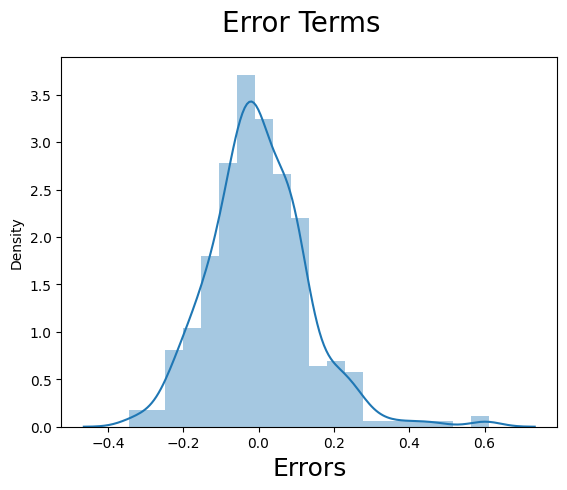

In [46]:
fig=plt.figure()
sns.distplot((y_tain-y_train_price),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

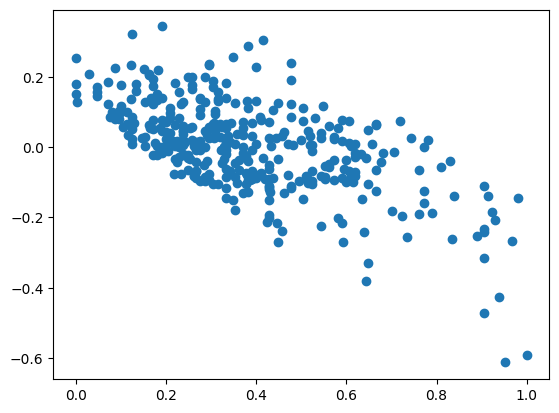

In [47]:
plt.scatter(y_tain,res)
plt.show()